In [24]:
#Importing required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
#load the dataset

liver_df = pd.read_csv(r"G:\Python\indian_liver_patient - indian_liver_patient.csv")

In [26]:
# View the first few rows

liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [27]:
#To check the no of rows and columns

liver_df.shape

(583, 11)

In [28]:
#To check the info 

liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [29]:
#To check missing values

liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [30]:
#Filling missing values in Albumin_and_Globulin_Ratio with median since very few missing and median isn’t affected by extreme values

liver_df['Albumin_and_Globulin_Ratio'] = liver_df['Albumin_and_Globulin_Ratio'].fillna(liver_df['Albumin_and_Globulin_Ratio'].median())

In [31]:
#To check missing values after imputation

liver_df.isnull().sum()  

# Observation : No missing values found

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [32]:
#Summary Statistic

liver_df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.946947,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318495,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


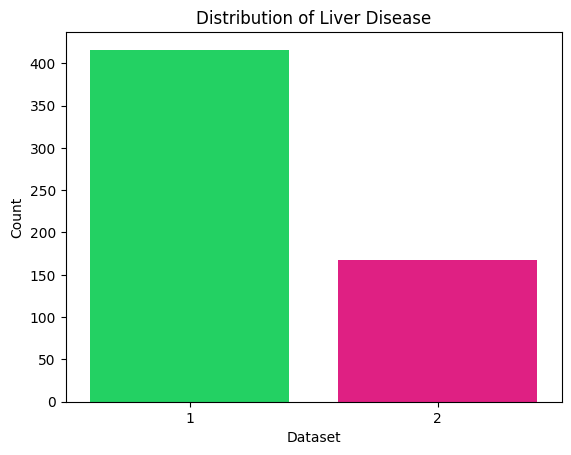

In [33]:
#Distribution of Target(Dataset)
liver_df['Dataset'] = liver_df['Dataset'].astype(int)

custom_palette = {1: "#06ee5bdd", 2: "#ff0084"}

sns.countplot(x='Dataset', hue='Dataset', data=liver_df,
              palette=custom_palette, dodge=False)
plt.legend([],[], frameon=False)  # hide legend
plt.title("Distribution of Liver Disease")
plt.xlabel("Dataset")
plt.ylabel("Count")
plt.show()



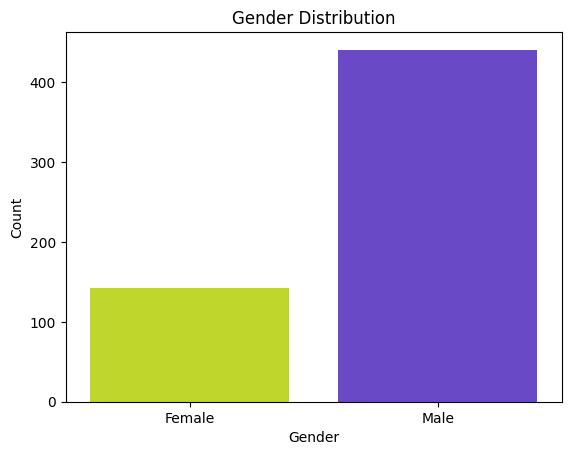

In [34]:

# Custom palette for Gender
custom_palette = {'Male': "#6034dbfc", 'Female': "#d4f210"}

sns.countplot(x='Gender', data=liver_df, hue='Gender', palette=custom_palette, dodge=False)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend([],[], frameon=False)  # hides the legend
plt.show()


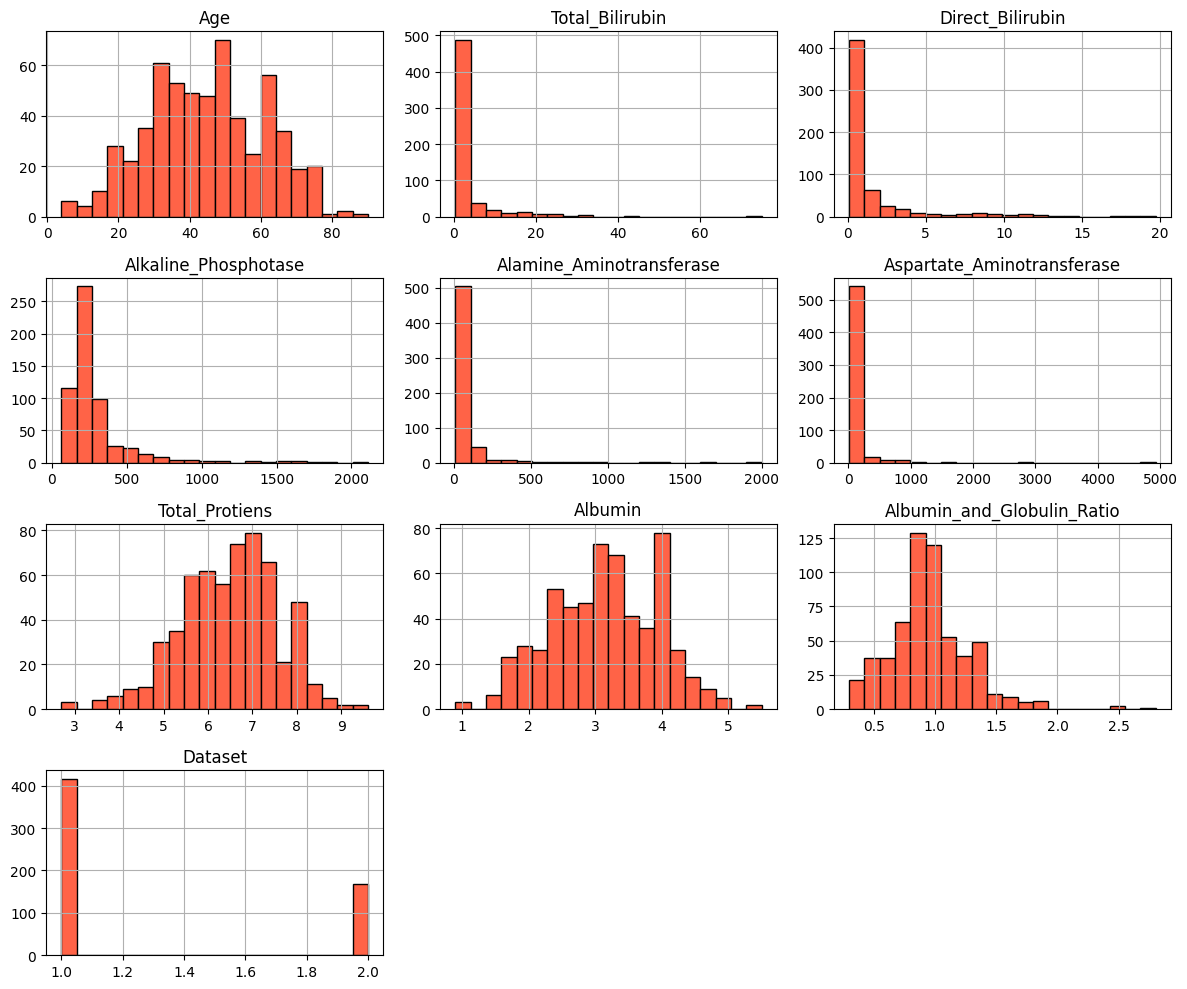

In [35]:
liver_df.hist(figsize=(12,10), bins=20, color="tomato", edgecolor="black")
plt.tight_layout()
plt.show()


In [36]:
#Encode Gender

liver_df['Gender'] = liver_df['Gender'].map({'Male': 1, 'Female': 0})



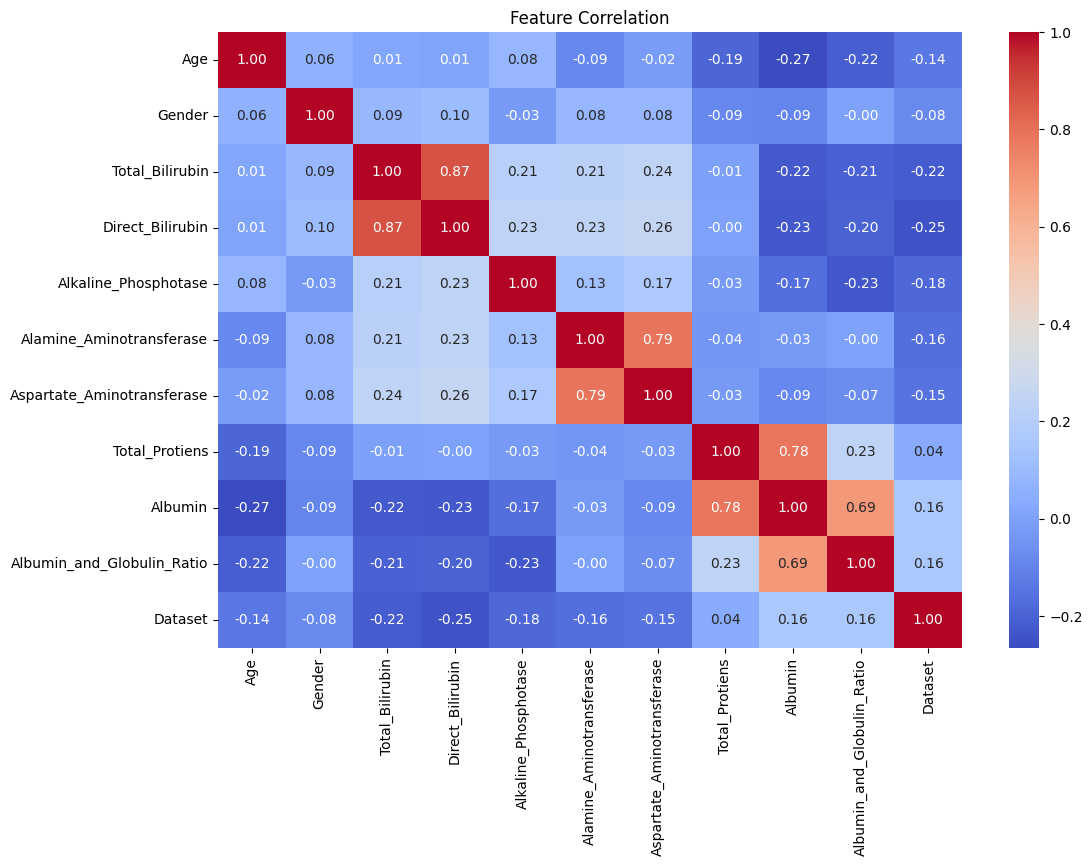


Top Positively Correlated Features with Dataset:
Albumin_and_Globulin_Ratio    0.162144
Albumin                       0.161388
Total_Protiens                0.035008
Gender                       -0.082416
Age                          -0.137351
Name: Dataset, dtype: float64

Top Negatively Correlated Features with Dataset:
Aspartate_Aminotransferase   -0.151934
Alamine_Aminotransferase     -0.163416
Alkaline_Phosphotase         -0.184866
Total_Bilirubin              -0.220208
Direct_Bilirubin             -0.246046
Name: Dataset, dtype: float64


In [37]:
# ======================
# Correlation Heatmap
# ======================
plt.figure(figsize=(12,8))
sns.heatmap(liver_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation')
plt.show()

# ======================
# Positive & Negative Correlations w.r.t Target
# ======================
corr_target = liver_df.corr()['Dataset'].drop('Dataset')  # drop self-correlation

# Sort correlations
sorted_corr = corr_target.sort_values(ascending=False)

print("\nTop Positively Correlated Features with Dataset:")
print(sorted_corr.head(5))

print("\nTop Negatively Correlated Features with Dataset:")
print(sorted_corr.tail(5))

In [38]:
# Convert Dataset values from [1,2] → [0,1]
liver_df['Dataset'] = liver_df['Dataset'].map({1: 0, 2: 1})

In [39]:
#Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV


In [40]:
# 3. Features and target variable
X = liver_df.drop(columns=['Dataset'])
y = liver_df['Dataset']

In [41]:
# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [42]:
# 5. Model Training
# Logistic Regression

lr_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000))
])

lr_param_grid = {           # Define the parameter grid for hyperparameter tuning
    'clf__C': [0.1, 1, 10],
    'clf__penalty': ['l1', 'l2'],
    'clf__solver': ['liblinear']
}

lr_grid = GridSearchCV(lr_pipeline, lr_param_grid, cv=5, scoring='f1', n_jobs=-1)  # Use GridSearchCV for hyperparameter tuning
lr_grid.fit(X_train, y_train)  # Fit the model

y_pred_lr = lr_grid.predict(X_test)  # Make predictions on the test set
y_proba_lr = lr_grid.predict_proba(X_test)[:, 1]  # Get predicted probabilities

print("🔹 Logistic Regression + SMOTE Best Params:", lr_grid.best_params_)
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_lr))

🔹 Logistic Regression + SMOTE Best Params: {'clf__C': 1, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.90      0.57      0.70        83
           1       0.45      0.85      0.59        34

    accuracy                           0.65       117
   macro avg       0.68      0.71      0.64       117
weighted avg       0.77      0.65      0.66       117

Confusion Matrix:
 [[47 36]
 [ 5 29]]
ROC-AUC Score: 0.7214741318214033


In [43]:
# Random Forest 
rf_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(random_state=42))
])

rf_param_grid = {           # Define the parameter grid for hyperparameter tuning
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 5, 10]
}

rf_grid = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='f1', n_jobs=-1)  # Use GridSearchCV for hyperparameter tuning
rf_grid.fit(X_train, y_train)  # Fit the model

y_pred_rf = rf_grid.predict(X_test)  # Make predictions on the test set
y_proba_rf = rf_grid.predict_proba(X_test)[:, 1]  # Get predicted probabilities

print("🔹 Random Forest + SMOTE Best Params:", rf_grid.best_params_)
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_rf))

🔹 Random Forest + SMOTE Best Params: {'clf__max_depth': 5, 'clf__n_estimators': 200}
              precision    recall  f1-score   support

           0       0.91      0.60      0.72        83
           1       0.47      0.85      0.60        34

    accuracy                           0.68       117
   macro avg       0.69      0.73      0.66       117
weighted avg       0.78      0.68      0.69       117

Confusion Matrix:
 [[50 33]
 [ 5 29]]
ROC-AUC Score: 0.7317505315379164


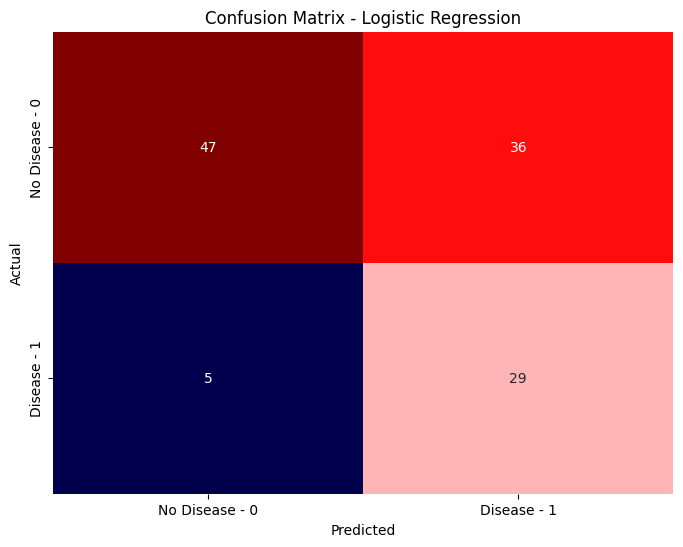

In [44]:
# -----------------------------
# Confusion Matrix - Logistic Regression
# -----------------------------
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='seismic', cbar=False,
            xticklabels=['No Disease - 0', 'Disease - 1'],
            yticklabels=['No Disease - 0', 'Disease - 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

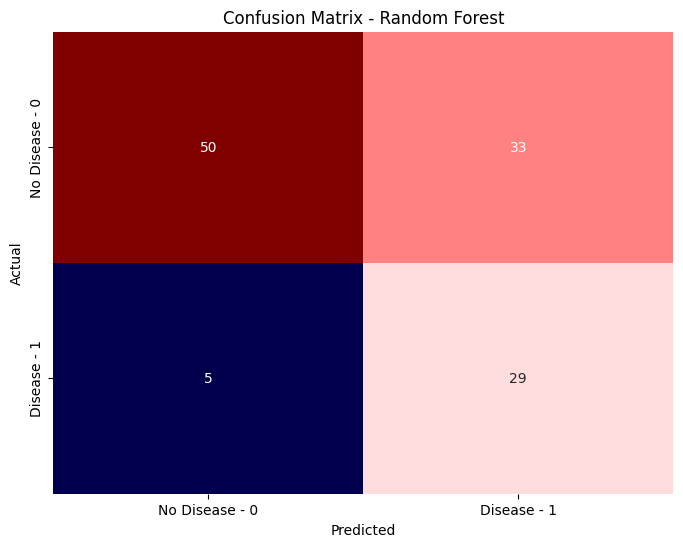

In [45]:
# Confusion Matrix - Random Forest
# -----------------------------
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='seismic', cbar=False,
            xticklabels=['No Disease - 0', 'Disease - 1'],
            yticklabels=['No Disease - 0', 'Disease - 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


In [46]:
# Save and load the best model
import joblib
joblib.dump(rf_grid.best_estimator_, 'best_rf_model_liver.pkl')  # Save the best Random Forest model

best_rf_model = joblib.load('best_rf_model_liver.pkl')  # Load the best Random Forest model